In [48]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
from astropy.table import Table
from scipy.interpolate import interp1d
import sys
sys.path.append('../analysis/')
import read_mist_models
import analysis_utils

highlight = np.array((66, 135, 245))/255
red = '#FE4365'
blue = '#00A9FF'
yellow = '#ECA25C'
green = '#3F9778'
darkblue = '#005D7F'
pl.rc('image', cmap='plasma')

In [49]:
import os
data = pd.DataFrame()
for file in os.listdir('../output/txtoutput'):
    print("reading file: {0}".format(file))
    data = data.append(pd.read_csv('../output/txtoutput/'+file, skiprows=1, delimiter='\t'))

reading file: out8.dat
reading file: out18.dat
reading file: out16.dat
reading file: out112.dat
reading file: out17.dat
reading file: out15.dat
reading file: out111.dat
reading file: out14.dat
reading file: out13.dat
reading file: out102.dat
reading file: out12.dat
reading file: out3.dat
reading file: out2.dat
reading file: out0.dat
reading file: out1.dat
reading file: out5.dat
reading file: out4.dat
reading file: out6.dat
reading file: out7.dat


In [50]:
k2dr2 = Table.read('../analysis/k2_dr2_1arcsec.fits', format='fits')
k2dr2 = k2dr2.to_pandas()
df = pd.merge(k2dr2, data, left_on='epic_number', right_on='epic')
df = df.drop_duplicates(subset='epic_number')

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: TableReplaceWarning: converted column 'r_result_flag' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: TableReplaceWarning: converted column 'r_modality_flag' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: TableReplaceWarning: converted column 'k2_kepmagerr' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
import imp
imp.reload(analysis_utils)
ms = analysis_utils.selectms(
    df, 
    '../analysis/MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd', 
    bp_rp_range=(0.0, 5.0),
    g_rp_range=(0.0, 5.0),
    width=(-0.6, 0.6)
)

Reading in: ../analysis/MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd


/usr/local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-52-dec317e5eacb>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incampaign = ms[good_P][df['k2_campaign_str'] == c]
<ipython-input-52-dec317e5eacb>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pl.gca().annotate('N = {0}'.format(len(ms[good_P][df['k2_campaign_str'] == c])), xy=(0.65, 0.07), xycoords='axes fraction', fontsize=25)
<ipython-input-52-dec317e5eacb>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incampaign = ms[good_P][df['k2_campaign_str'] == c]
<ipython-input-52-dec317e5eacb>:20: UserWarning: Boolean Series key will be reinde

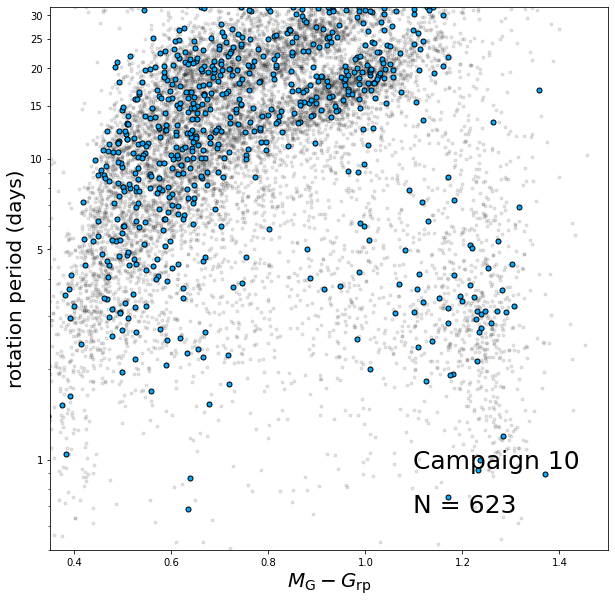

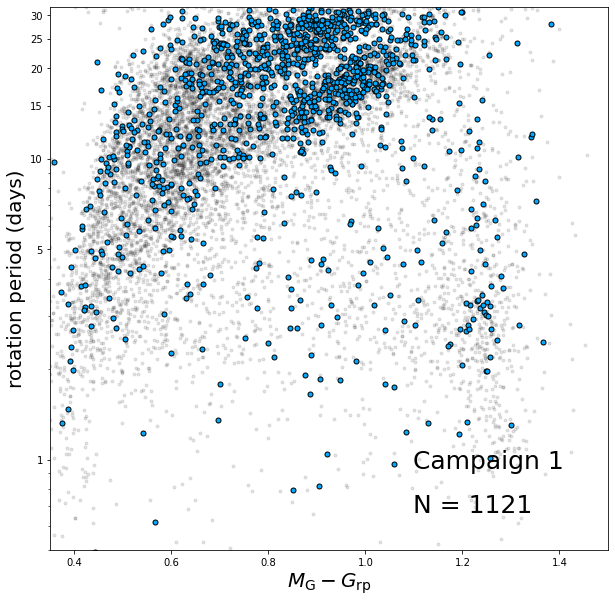

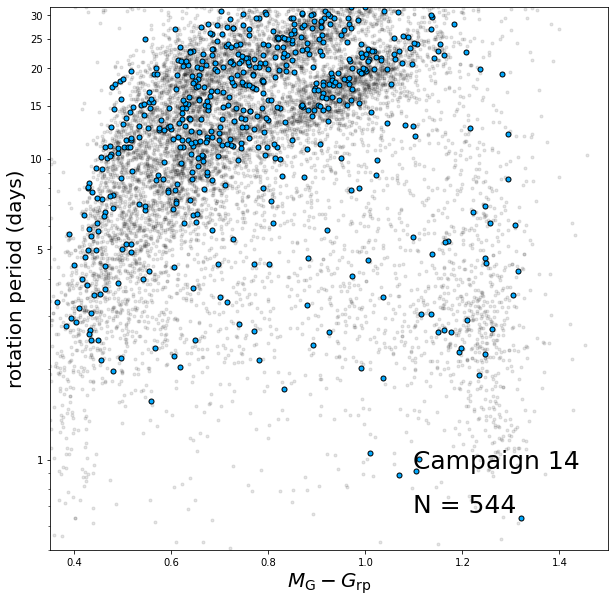

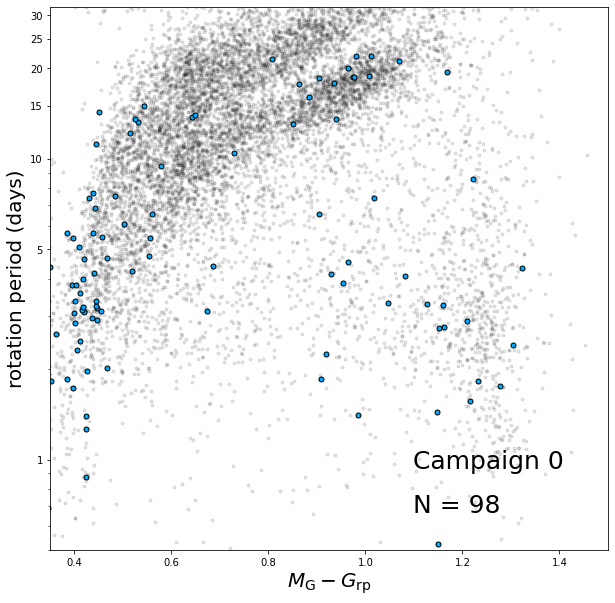

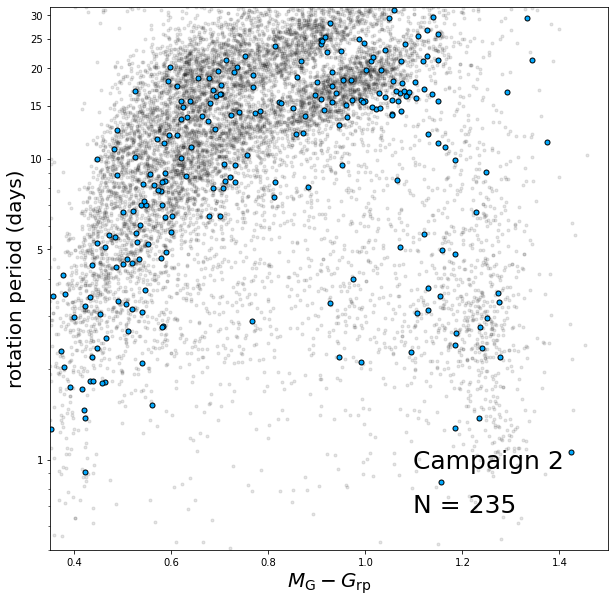

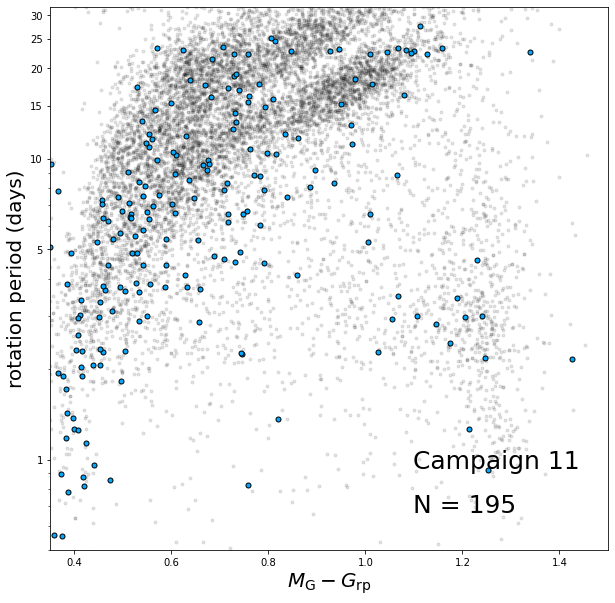

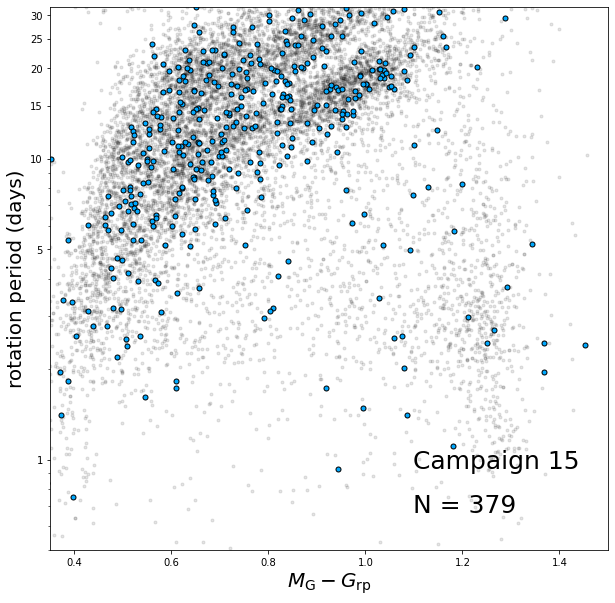

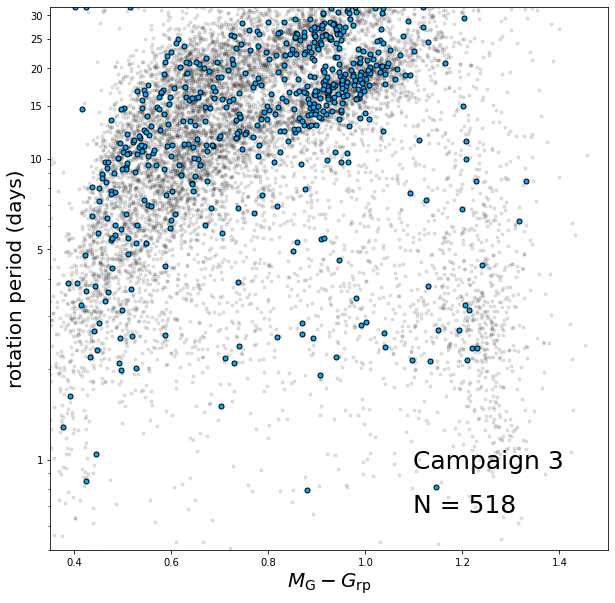

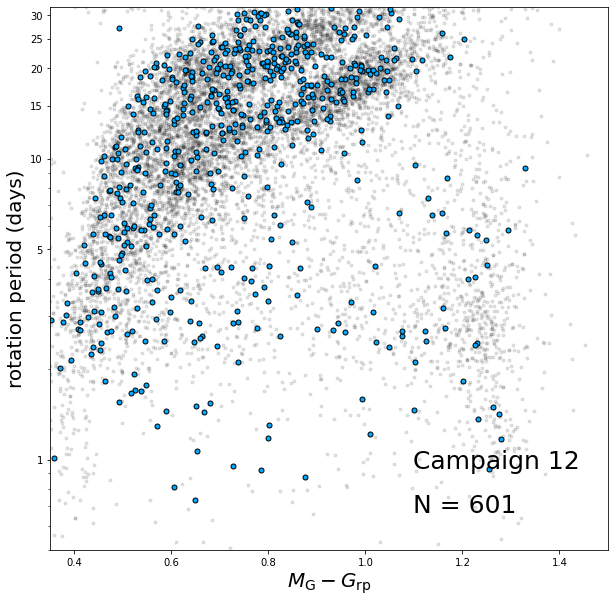

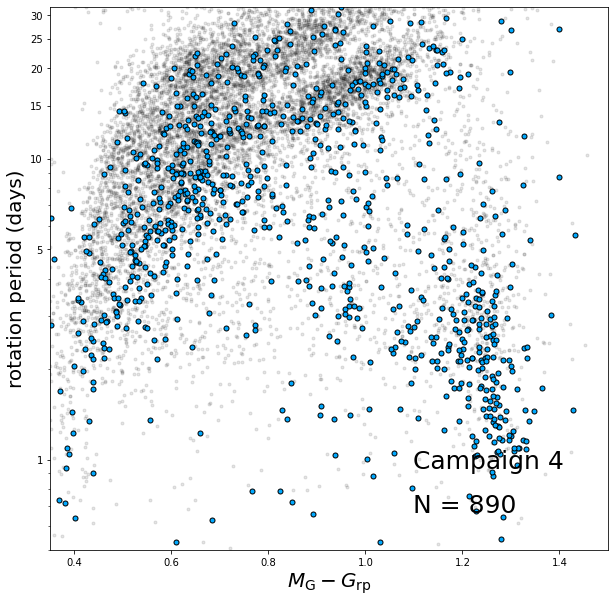

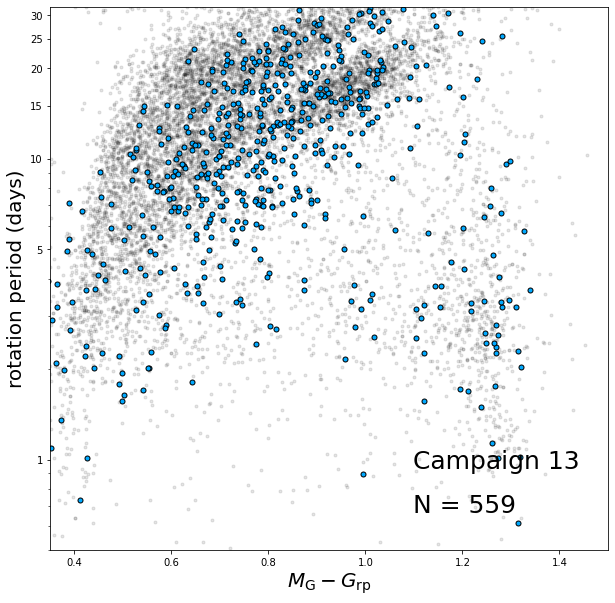

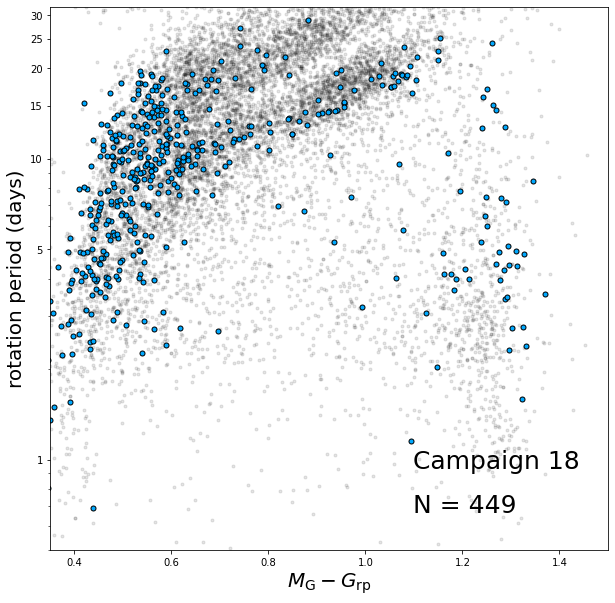

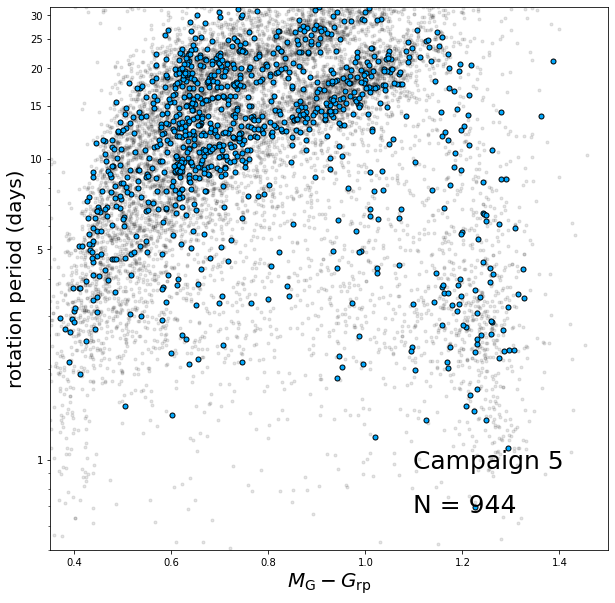

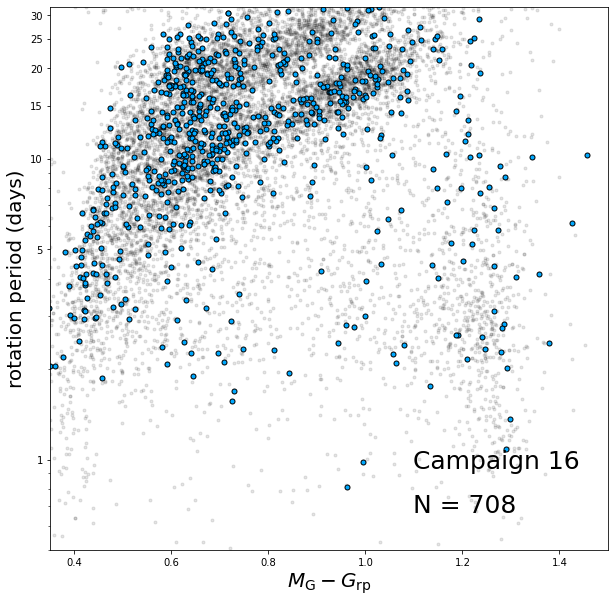

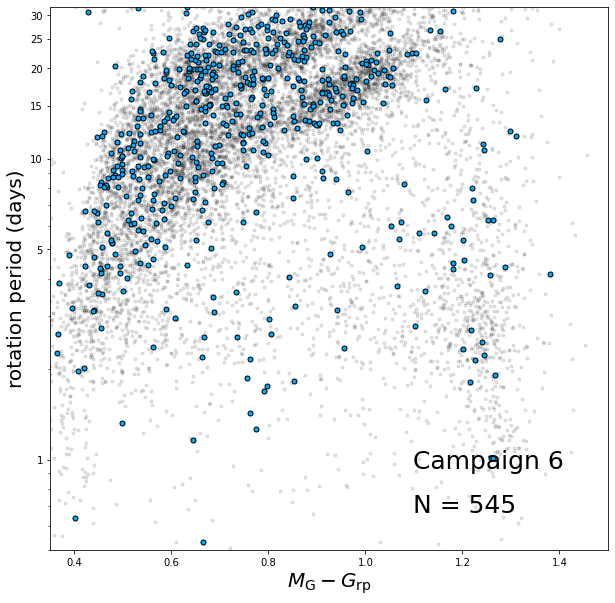

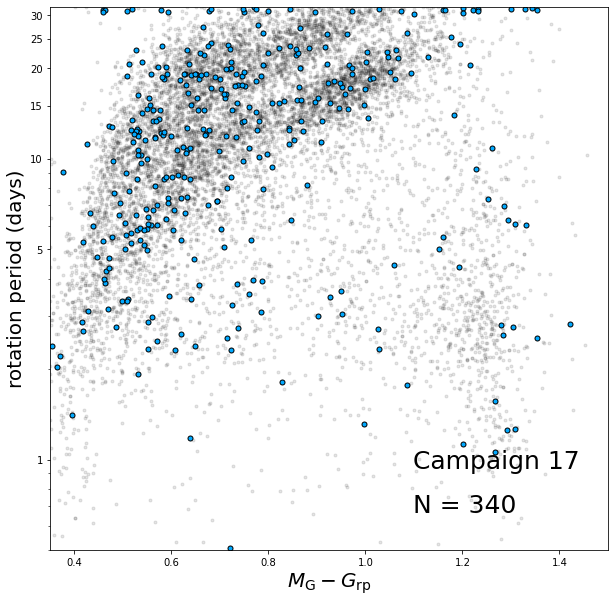

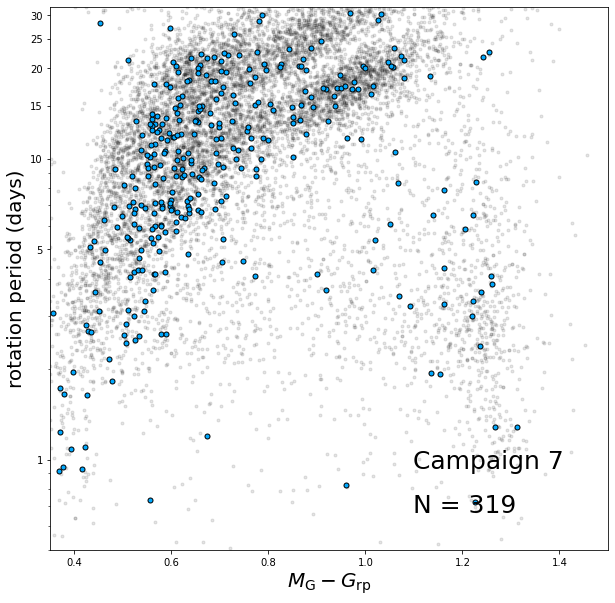

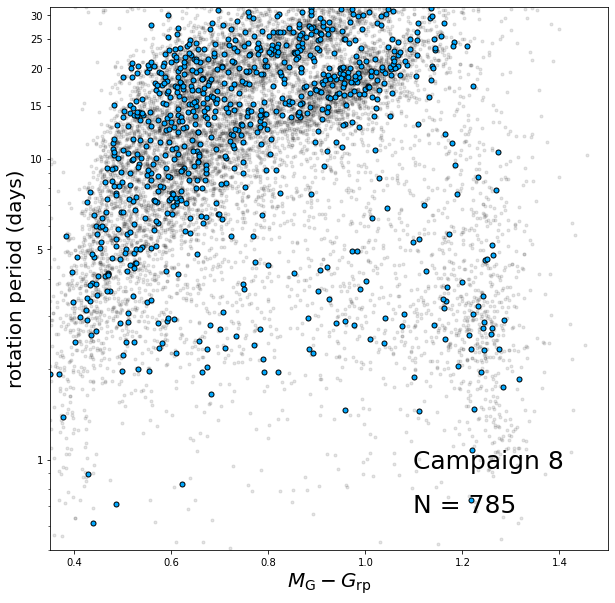

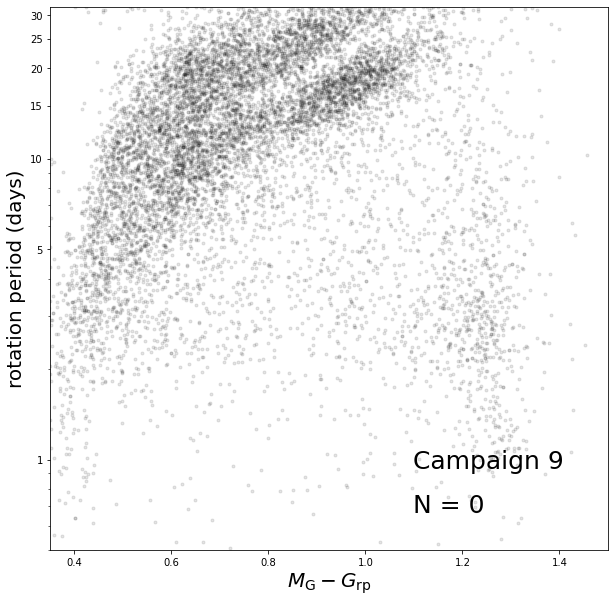

In [52]:
good_P = ms['P_mean'] / ms['P_sd'] > 15
good_P = good_P & (ms['P_mean'] < 32)
good_P = good_P & ((ms['logamp_mean'] - ms['logS0_mean']) > np.log(1e-3))
tau1 = ms['P_mean']*np.sqrt(np.exp(ms['logQ0_mean'])**2 - 1)
tau2 = ms['P_mean']*np.sqrt((np.exp(ms['logQ0_mean'])+ np.exp(ms['logdQ_mean']))**2 - 1)
color = np.log(tau1 + tau2)

for c in df['k2_campaign_str'].unique():
    incampaign = ms[good_P][df['k2_campaign_str'] == c]
    camp = str(c)[2:-1]
    
    pl.figure(figsize=(10, 10))
    pl.semilogy(ms[good_P]['g_rp'], ms[good_P]['P_mean'], 'k.', alpha=0.1)
    pl.semilogy(incampaign['g_rp'], incampaign['P_mean'], 'o', color=blue, alpha=1, ms=5, markeredgewidth=1, markeredgecolor='k')
    pl.yscale('log')
    pl.xlim(0.35, 1.5)
    pl.ylim(0.5, 32)
    pl.gca().yaxis.set_major_formatter(pl.ScalarFormatter())
    pl.gca().set_yticks([1, 5, 10, 15, 20, 25, 30])
    pl.gca().annotate('N = {0}'.format(len(ms[good_P][df['k2_campaign_str'] == c])), xy=(0.65, 0.07), xycoords='axes fraction', fontsize=25)
    pl.gca().annotate('Campaign {0}'.format(camp), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=25)
    pl.xlabel(r'$M_\mathrm{G} - G_\mathrm{rp}$', fontsize=20)
    pl.ylabel('rotation period (days)', fontsize=20)
    pl.savefig('/Users/tgordon/Desktop/cpd_campaign/c{0}.pdf'.format(camp))